In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df =pd.read_csv('/content/heart_failure_clinical_records_dataset (1) (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.836120,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
X = df.loc[:, df.columns !=  'DEATH_EVENT']
Y = df['DEATH_EVENT']

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
criterion='gini', max_depth=2, max_features='auto',
max_leaf_nodes=None, max_samples=None,
min_impurity_decrease=0.0,
min_samples_leaf=2, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=100,
n_jobs=None, oob_score=False, random_state=None,  verbose=0, warm_start=False)
classifier = rf

In [ ]:
#Splitting mixed Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84        37
           1       0.91      0.43      0.59        23

    accuracy                           0.77        60
   macro avg       0.82      0.70      0.71        60
weighted avg       0.80      0.77      0.74        60



In [ ]:
df_one = df[df['DEATH_EVENT']==1]
df_one
X_one = df.loc[:, df_one.columns !=  'DEATH_EVENT']

In [ ]:
# from ctgan import CTGANSynthesizer
# ctgan = CTGANSynthesizer()
# # Train the model
# ctgan.fit(X_one, discrete_columns=('anaemia','diabetes','high_blood_pressure','sex','smoking'))
# # Once trained generate samples
# samples = ctgan.sample(107)
# # samples = samples[samples['DEATH_EVENT'] ==1.0]
# ctgan_result_df = pd.concat([df,samples])
# ctgan_result_df.head()

In [ ]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()
# Train the model
ctgan.fit(X_one, discrete_columns=('anaemia','diabetes','high_blood_pressure','sex','smoking', 'time','platelets','creatinine_phosphokinase'))
# Once trained generate samples
samples = ctgan.sample(107)
samples.describe()
# # samples = samples[samples['DEATH_EVENT'] ==1.0]
# ctgan_result_df = pd.concat([df,samples])
# ctgan_result_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,59.663551,0.448598,515.476636,0.588785,31.841121,0.271028,259537.439252,1.609616,138.532710,0.532710,0.420561,127.186916
std,11.330327,0.499691,716.031323,0.494370,12.596158,0.446582,106690.039462,1.191961,4.605816,0.501277,0.495972,69.855394
min,40.000000,0.000000,47.000000,0.000000,13.000000,0.000000,87000.000000,0.489697,122.000000,0.000000,0.000000,7.000000
25%,51.500000,0.000000,129.500000,0.000000,21.000000,0.000000,204000.000000,0.923162,136.000000,0.000000,0.000000,77.500000
50%,58.000000,0.000000,250.000000,1.000000,33.000000,0.000000,233000.000000,1.306017,139.000000,1.000000,0.000000,120.000000
75%,67.000000,1.000000,582.000000,1.000000,39.000000,1.000000,282500.000000,1.558062,141.000000,1.000000,1.000000,187.000000
max,94.000000,1.000000,5209.000000,1.000000,68.000000,1.000000,742000.000000,7.652744,149.000000,1.000000,1.000000,246.000000


In [ ]:
samples['DEATH_EVENT'] = 1
samples

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,50,1,190,1,14,1,188000,1.416161,137,1,0,97,1
1,60,0,582,1,41,0,87000,1.537492,138,1,1,104,1
2,44,1,582,1,36,0,189000,4.010576,140,0,1,7,1
3,54,0,719,0,39,0,327000,0.863924,132,0,0,214,1
4,76,1,62,1,22,1,221000,1.407677,137,1,1,170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,60,1,720,1,44,0,200000,0.921409,138,1,0,180,1
103,56,0,231,1,39,1,260000,0.932406,136,0,1,95,1
104,54,1,130,0,27,0,621000,1.326844,141,0,1,74,1
105,77,0,571,0,21,0,277000,1.348125,135,0,0,187,1


In [ ]:
ctgan_result_df = pd.concat([df,samples])
ctgan_result_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,60.527094,0.435961,564.349754,0.463054,36.438424,0.330049,262351.123153,1.450736,137.128079,0.618227,0.347291,129.450739,0.500000
std,11.746205,0.496494,909.820202,0.499248,12.335631,0.470811,100102.325037,1.080914,4.537182,0.486421,0.476697,75.574222,0.500617
min,40.000000,0.000000,23.000000,0.000000,13.000000,0.000000,25100.000000,0.489697,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,122.000000,0.000000,27.500000,0.000000,210250.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,35.000000,0.000000,254500.000000,1.139288,137.000000,1.000000,0.000000,117.000000,0.500000
75%,68.000000,1.000000,582.000000,1.000000,40.000000,1.000000,300750.000000,1.499796,140.000000,1.000000,1.000000,197.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,149.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
X = ctgan_result_df.loc[:, ctgan_result_df.columns !=  'DEATH_EVENT']
Y = ctgan_result_df['DEATH_EVENT']

In [ ]:
#Splitting mixed Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=150)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.75      0.85      0.80        39

    accuracy                           0.79        82
   macro avg       0.80      0.80      0.79        82
weighted avg       0.80      0.79      0.79        82



In [ ]:
ctgan_result_df.to_csv("ctgan_result_oversampling.csv")

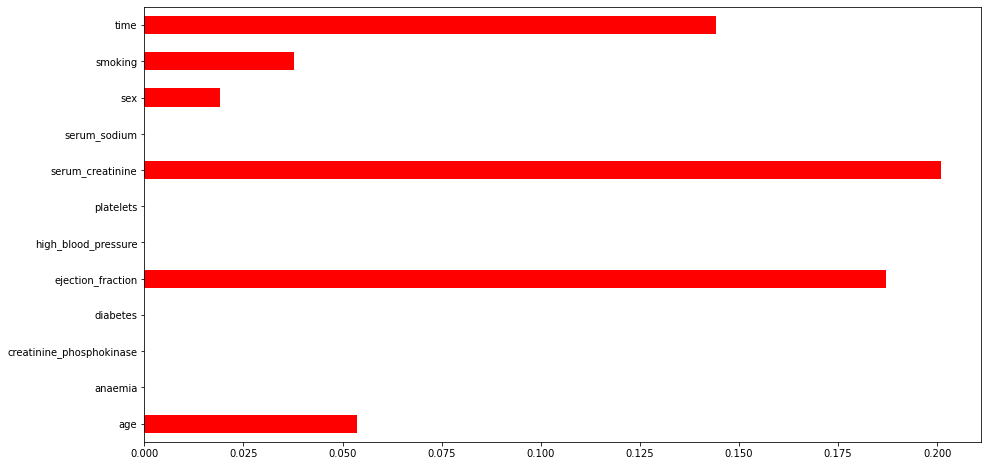

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,Y)
feat_features = pd.Series(importances,X.columns)
feat_features.plot(kind = 'barh', color = 'red',figsize = (15,8))
plt.show()

In [ ]:
ctgan_result_df_two_features = ctgan_result_df[['creatinine_phosphokinase',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'time',	'DEATH_EVENT']]
X = ctgan_result_df_two_features.loc[:, ctgan_result_df_two_features.columns !=  'DEATH_EVENT']
Y = ctgan_result_df_two_features[['DEATH_EVENT']]
#Splitting mixed Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=150)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print(classification_report(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.83      0.79      0.81        43
           1       0.78      0.82      0.80        39

    accuracy                           0.80        82
   macro avg       0.80      0.81      0.80        82
weighted avg       0.81      0.80      0.80        82

